In [1]:
import pickle
import numpy as np
import tensorflow
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import Circle

In [2]:
with open('data_hand_pose.pickle','rb') as pickle_file_to_load:
    mydict = pickle.load(pickle_file_to_load)
    
for key in mydict.keys():
    print(mydict[key].shape)
    print(key)    

(9432, 290, 334, 3)
padded
(9432, 21, 2)
labels
(9432, 4, 1)
blabels


In [3]:
inputs = mydict['padded']
labels = mydict['labels']
blabels = mydict['blabels']


In [4]:
blabels = np.reshape(blabels,(blabels.shape[0],blabels.shape[1]*blabels.shape[2]))
print(blabels.shape)

labels = labels.reshape((labels.shape[0],labels.shape[1]*labels.shape[2]))
print(labels.shape)

(9432, 4)
(9432, 42)


In [5]:
mydict = None

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization

Using TensorFlow backend.


In [7]:
model = Sequential()

model.add(BatchNormalization())
model.add(Conv2D(32, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=inputs.shape[1:4],activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=inputs.shape[1:4],activation='relu'))
model.add(Dropout(0.25))


model.add(BatchNormalization())
model.add(Conv2D(128, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=inputs.shape[1:4],activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation='relu'))

In [8]:
model.compile(loss='mse',optimizer=keras.optimizers.Adam(lr=0.0001))


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 290, 334, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 166, 32)      1568      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 166, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 144, 166, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 82, 64)        32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 71, 82, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 71, 82, 64)        256       
__________

In [10]:
model.fit(inputs[:8500],labels[:8500],epochs=10,batch_size=64,verbose=1,validation_data=(inputs[8500:],labels[8500:]))

Train on 8500 samples, validate on 932 samples
Epoch 1/10
8500/8500 [==============================] - 62s 7ms/step - loss: 5887.7169 - val_loss: 2574.5552
Epoch 2/10
8500/8500 [==============================] - 55s 6ms/step - loss: 2327.2764 - val_loss: 912.9719
Epoch 3/10
8500/8500 [==============================] - 54s 6ms/step - loss: 1403.5591 - val_loss: 512.0335
Epoch 4/10
8500/8500 [==============================] - 55s 6ms/step - loss: 1051.5876 - val_loss: 405.0850
Epoch 5/10
8500/8500 [==============================] - 55s 6ms/step - loss: 875.0988 - val_loss: 389.6118
Epoch 6/10
8500/8500 [==============================] - 55s 7ms/step - loss: 772.2782 - val_loss: 367.5705
Epoch 7/10
8500/8500 [==============================] - 55s 7ms/step - loss: 682.4325 - val_loss: 410.8378
Epoch 8/10
8500/8500 [==============================] - 55s 7ms/step - loss: 613.0342 - val_loss: 404.8070
Epoch 9/10
8500/8500 [==============================] - 55s 6ms/step - loss: 565.3546 - val_

In [29]:
model.save('modelim.h5')

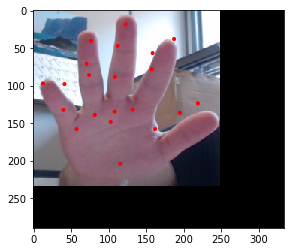

In [43]:
randomsayi = random.randint(8500,9300)

preds = model.predict(inputs[randomsayi:randomsayi+1])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(inputs[randomsayi])

for xx, yy in preds[0].reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)
    